In [ ]:
# Desinstalar versiones actuales problemáticas
!pip uninstall -y pycaret pandas matplotlib scikit-learn autoviz

# Instalación de versiones compatibles
!pip install pandas==1.3.3 matplotlib==3.4.3 scikit-learn==0.24.2 --quiet
!pip install pycaret==2.3.10 autoviz==0.0.83 --quiet

# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class
from pycaret.regression import *
import nltk
import warnings

# Descarga de recursos de NLTK
nltk.download('punkt')
warnings.filterwarnings('ignore')


Found existing installation: pycaret 3.3.2
Uninstalling pycaret-3.3.2:
  Successfully uninstalled pycaret-3.3.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: matplotlib 3.8.0
Uninstalling matplotlib-3.8.0:
  Successfully uninstalled matplotlib-3.8.0
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: autoviz 0.1.905
Uninstalling autoviz-0.1.905:
  Successfully uninstalled autoviz-0.1.905
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done


In [25]:
df = pd.read_csv("airbnb.csv")

In [26]:
df.shape

(102599, 26)

In [27]:
df_copy = df[:30000]

In [28]:
df_copy.to_csv('airbnb_coppy.csv', index=False)

In [29]:
df.head()

id                           NAME                          host id    \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0       unconfirmed       Madaline        Brooklyn        Kensington   
1          verified          Jenna       Manhattan           Midtown   
2               NaN          Elise       Manhattan            Harlem   
3       unconfirmed          Garry        Brooklyn      Clinton Hill   
4          verified         Lyndon       Manhattan       East Harlem   

      lat      long      country     country code instant_bookable  \
0  40.64749 -73.97237  United States      US            False        
1  40.75362 -73.98377  United States      US            False        
2  40.80902 -73.94190  United States      US             True        
3  40.68514 -73.95976  United States      US             True        
4  40.79851 -73.94399  United States      US            False        

  cancellation_policy    room type      Construction year price  service fee  \
0         strict          Private room       2020.0        $966      $193      
1       moderate       Entire home/apt       2007.0        $142       $28      
2       flexible          Private room       2005.0        $620      $124      
3       moderate       Entire home/apt       2005.0        $368       $74      
4       moderate       Entire home/apt       2009.0        $204       $41      

   minimum nights  number of reviews last review  reviews per month  \
0       10.0               9.0        10/19/2021        0.21          
1       30.0              45.0         5/21/2022        0.38          
2        3.0               0.0               NaN         NaN          
3       30.0             270.0          7/5/2019        4.64          
4       10.0               9.0        11/19/2018        0.10          

   review rate number  calculated host listings count  availability 365  \
0          4.0                       6.0                     286.0        
1          4.0                       2.0                     228.0        
2          5.0                       1.0                     352.0        
3          4.0                       1.0                     322.0        
4          3.0                       1.0                     289.0        

                                                                                                                                                                                                      house_rules                                                                                                                                                                                                       \
0                                                                                                                                                                                                                                                                                                                                 Clean up and treat the home the way you'd like your home to be treated.  No smoking.   
1  Pet friendly but please confirm with me if the pet you are planning on bringing with you is OK. I have a cute and quiet mixed chihuahua. I could accept more guests (for an extra fee) but this also needs to be confirmed beforehand. Also friends traveling together could sleep in separate beds for an extra fee (the second bed is either a sofa bed or inflatable bed). Smoking is only allowed on the porch.   
2                               I encourage you to use my kitchen, cooking and laundry facilities. 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [31]:
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules                        52131
license                           102597
dtype: int64

In [32]:
df.drop(columns = ['license'], inplace = True)

Shape of your Data Set loaded: (102599, 25)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    25 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
There are 541 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


Number of All Scatter Plots = 45


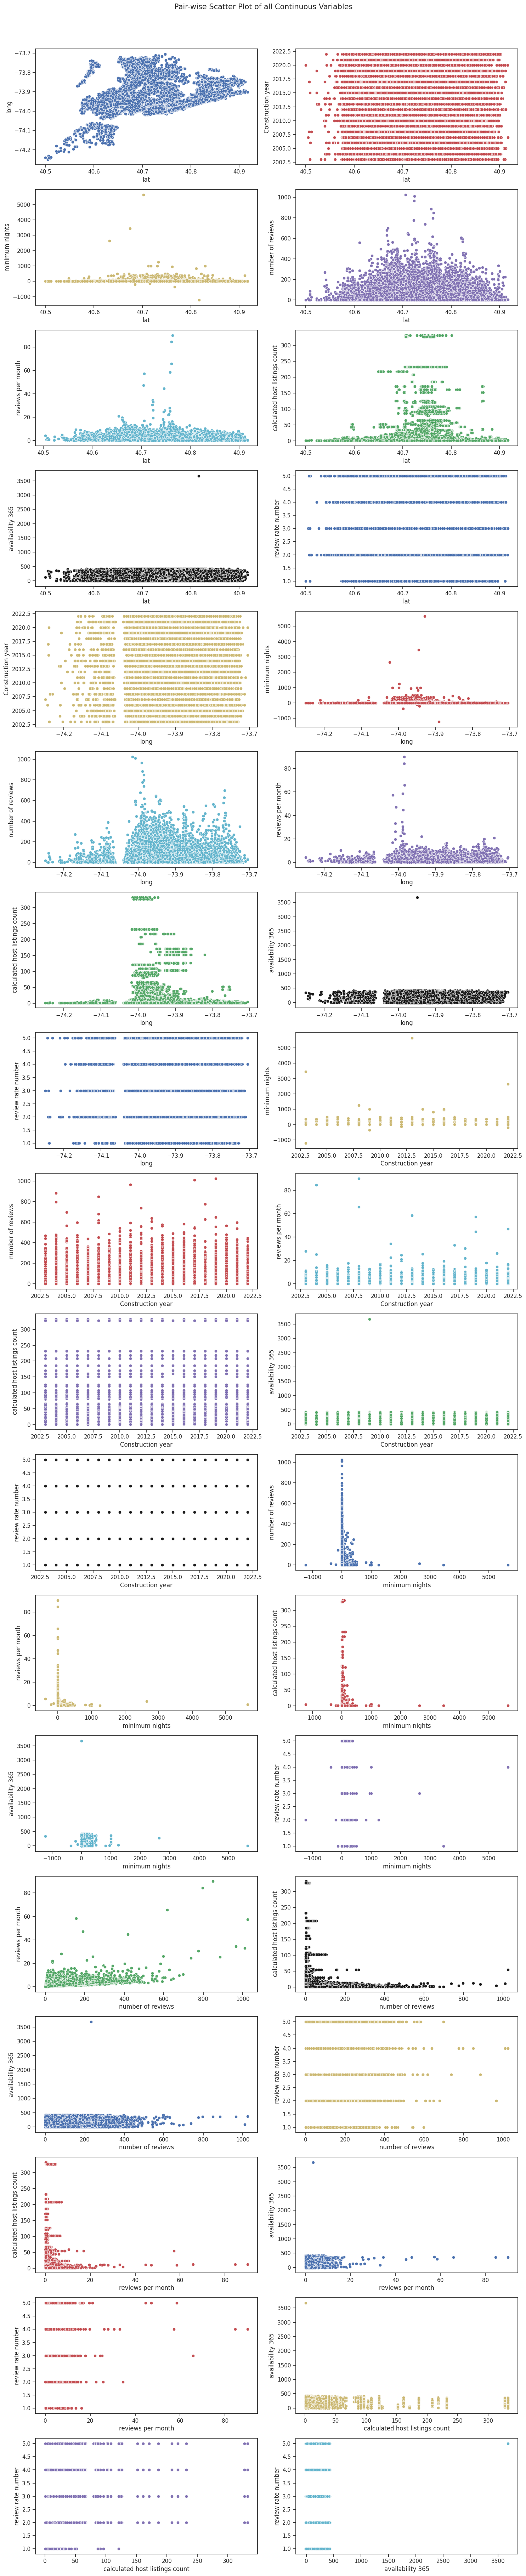

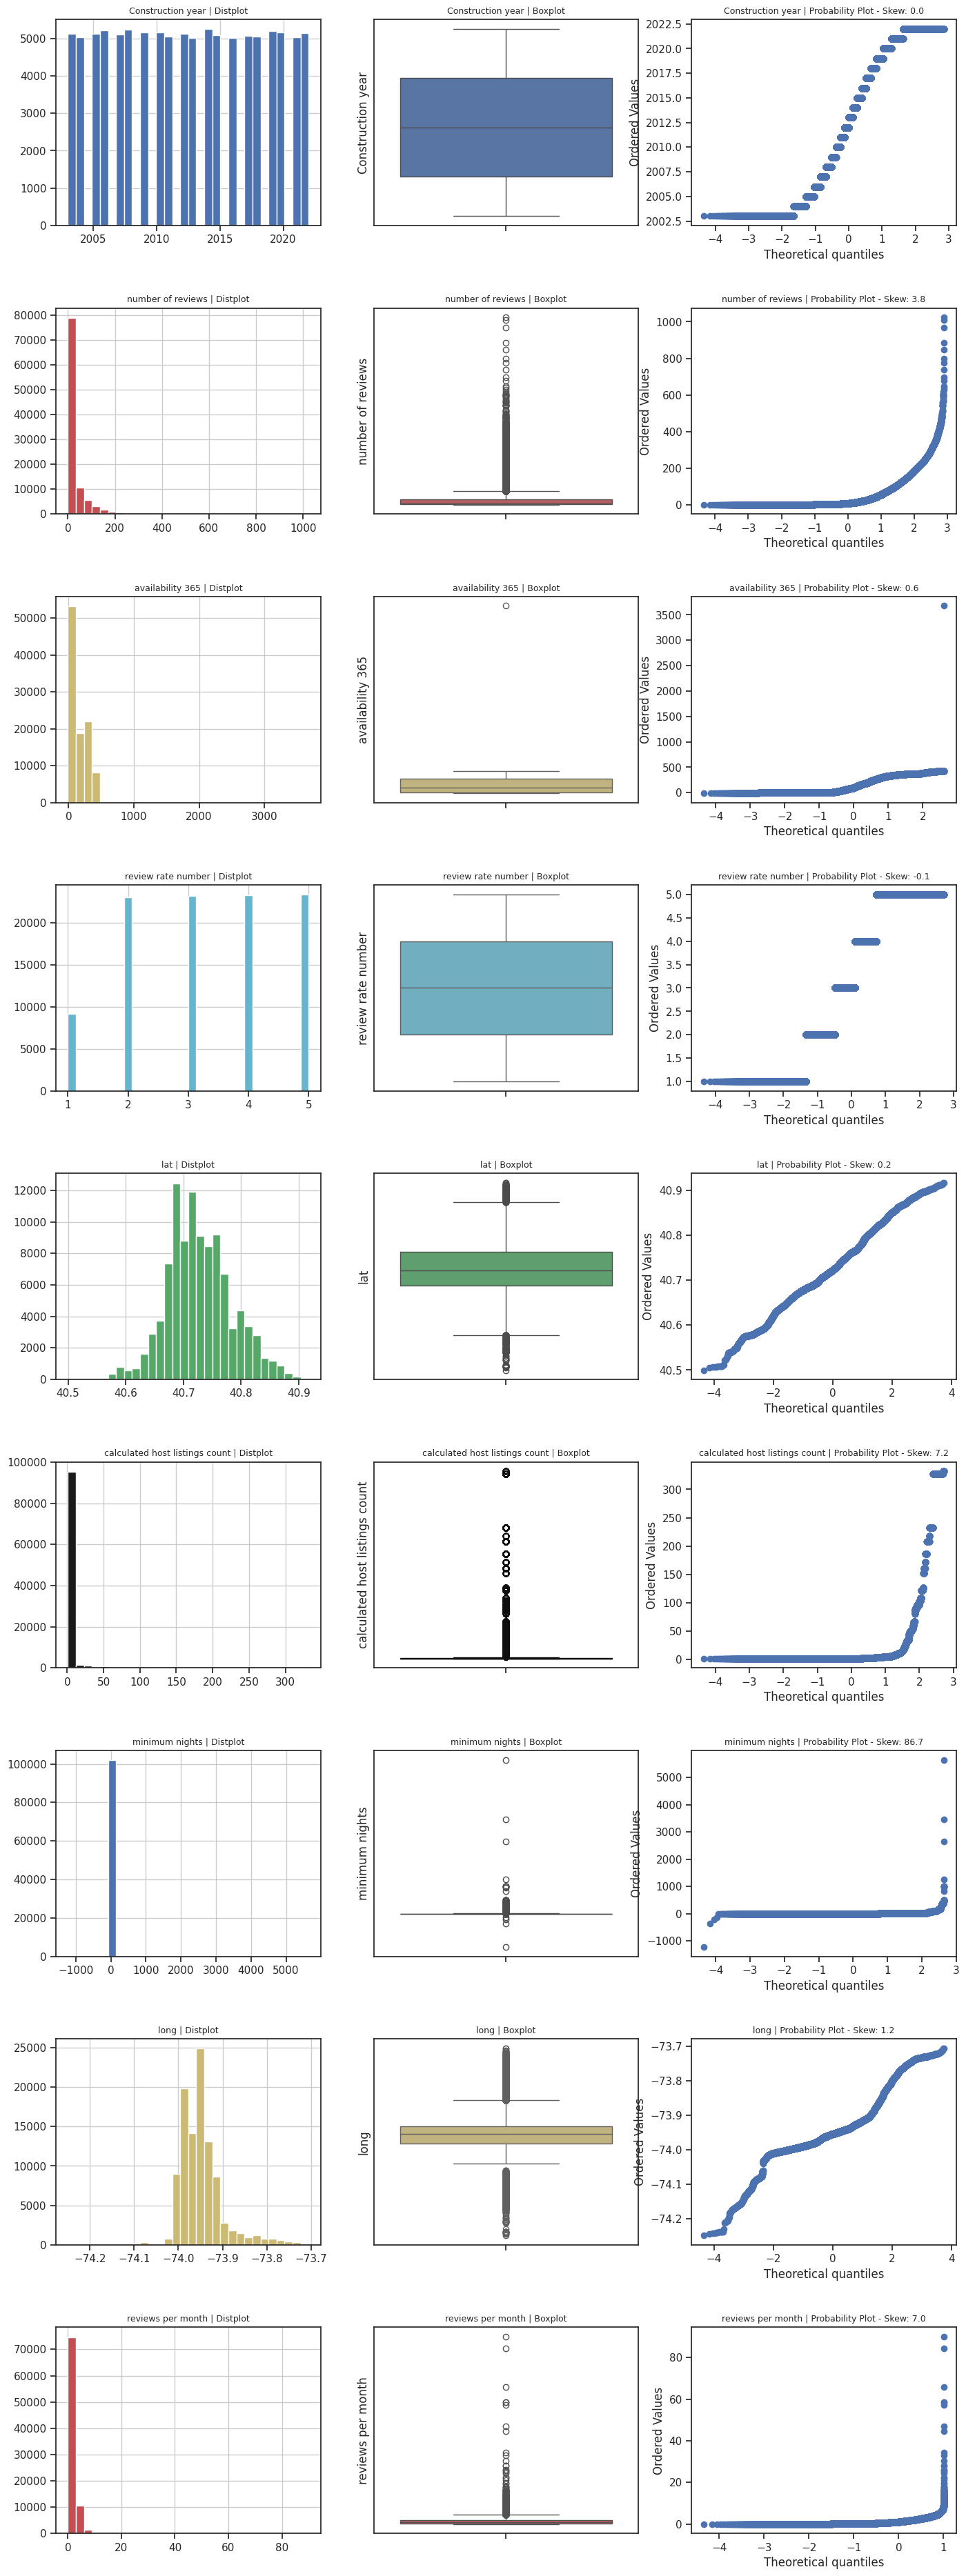

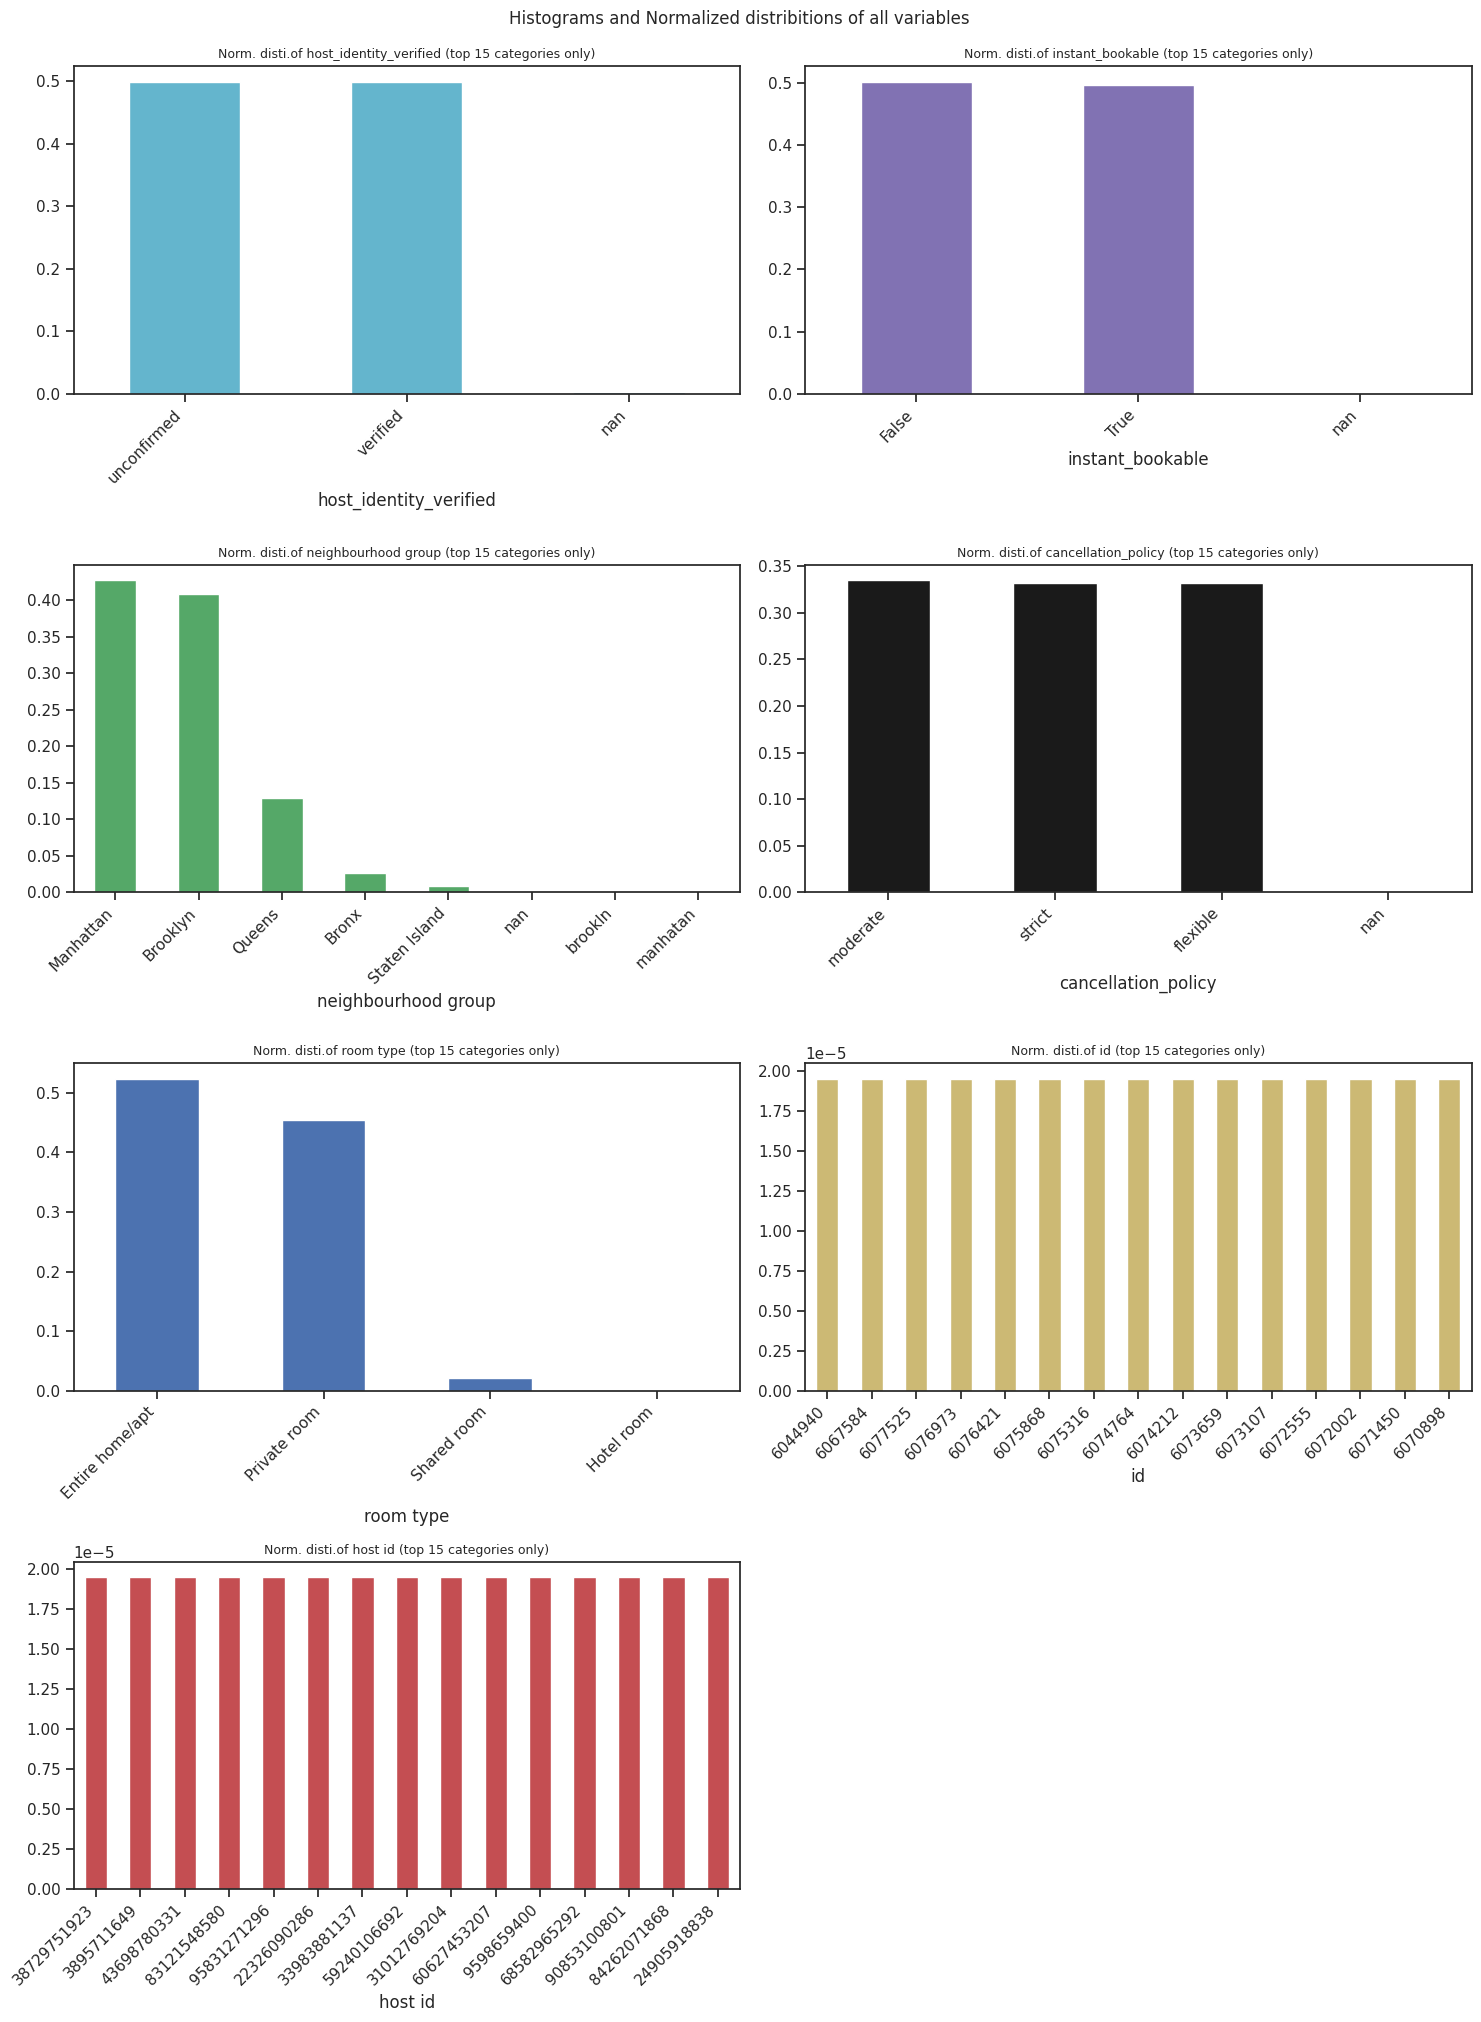

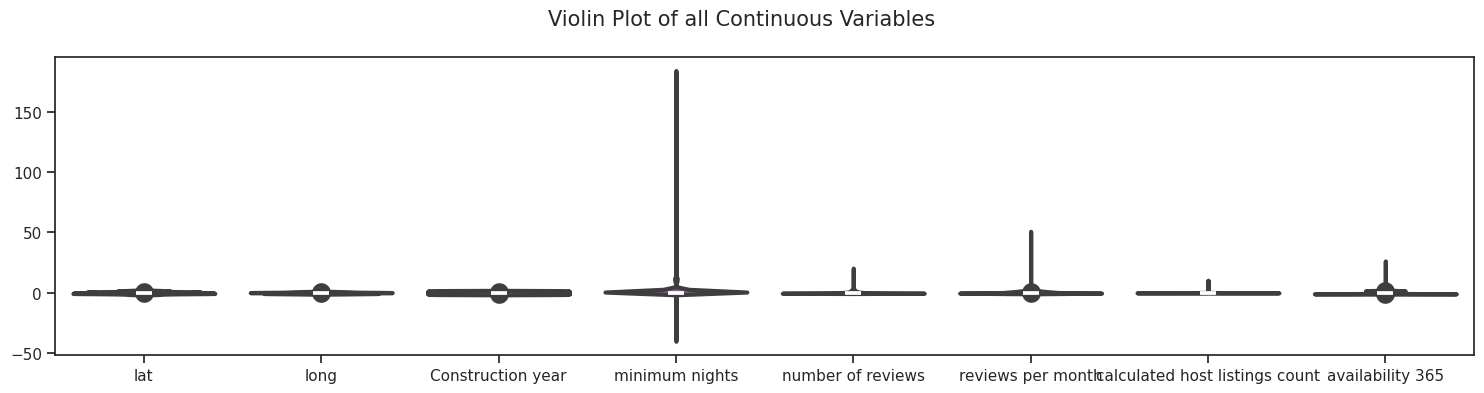

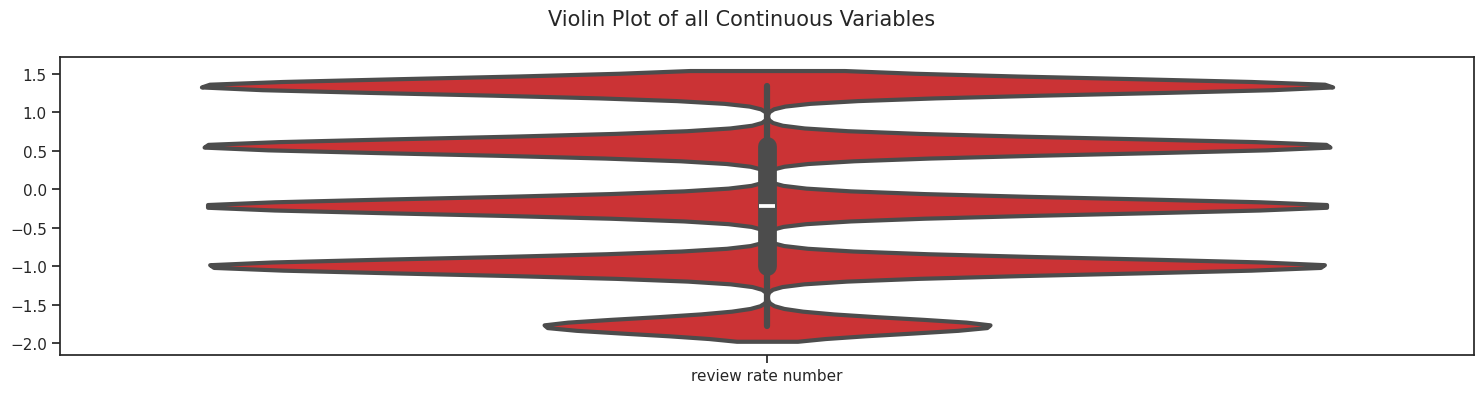

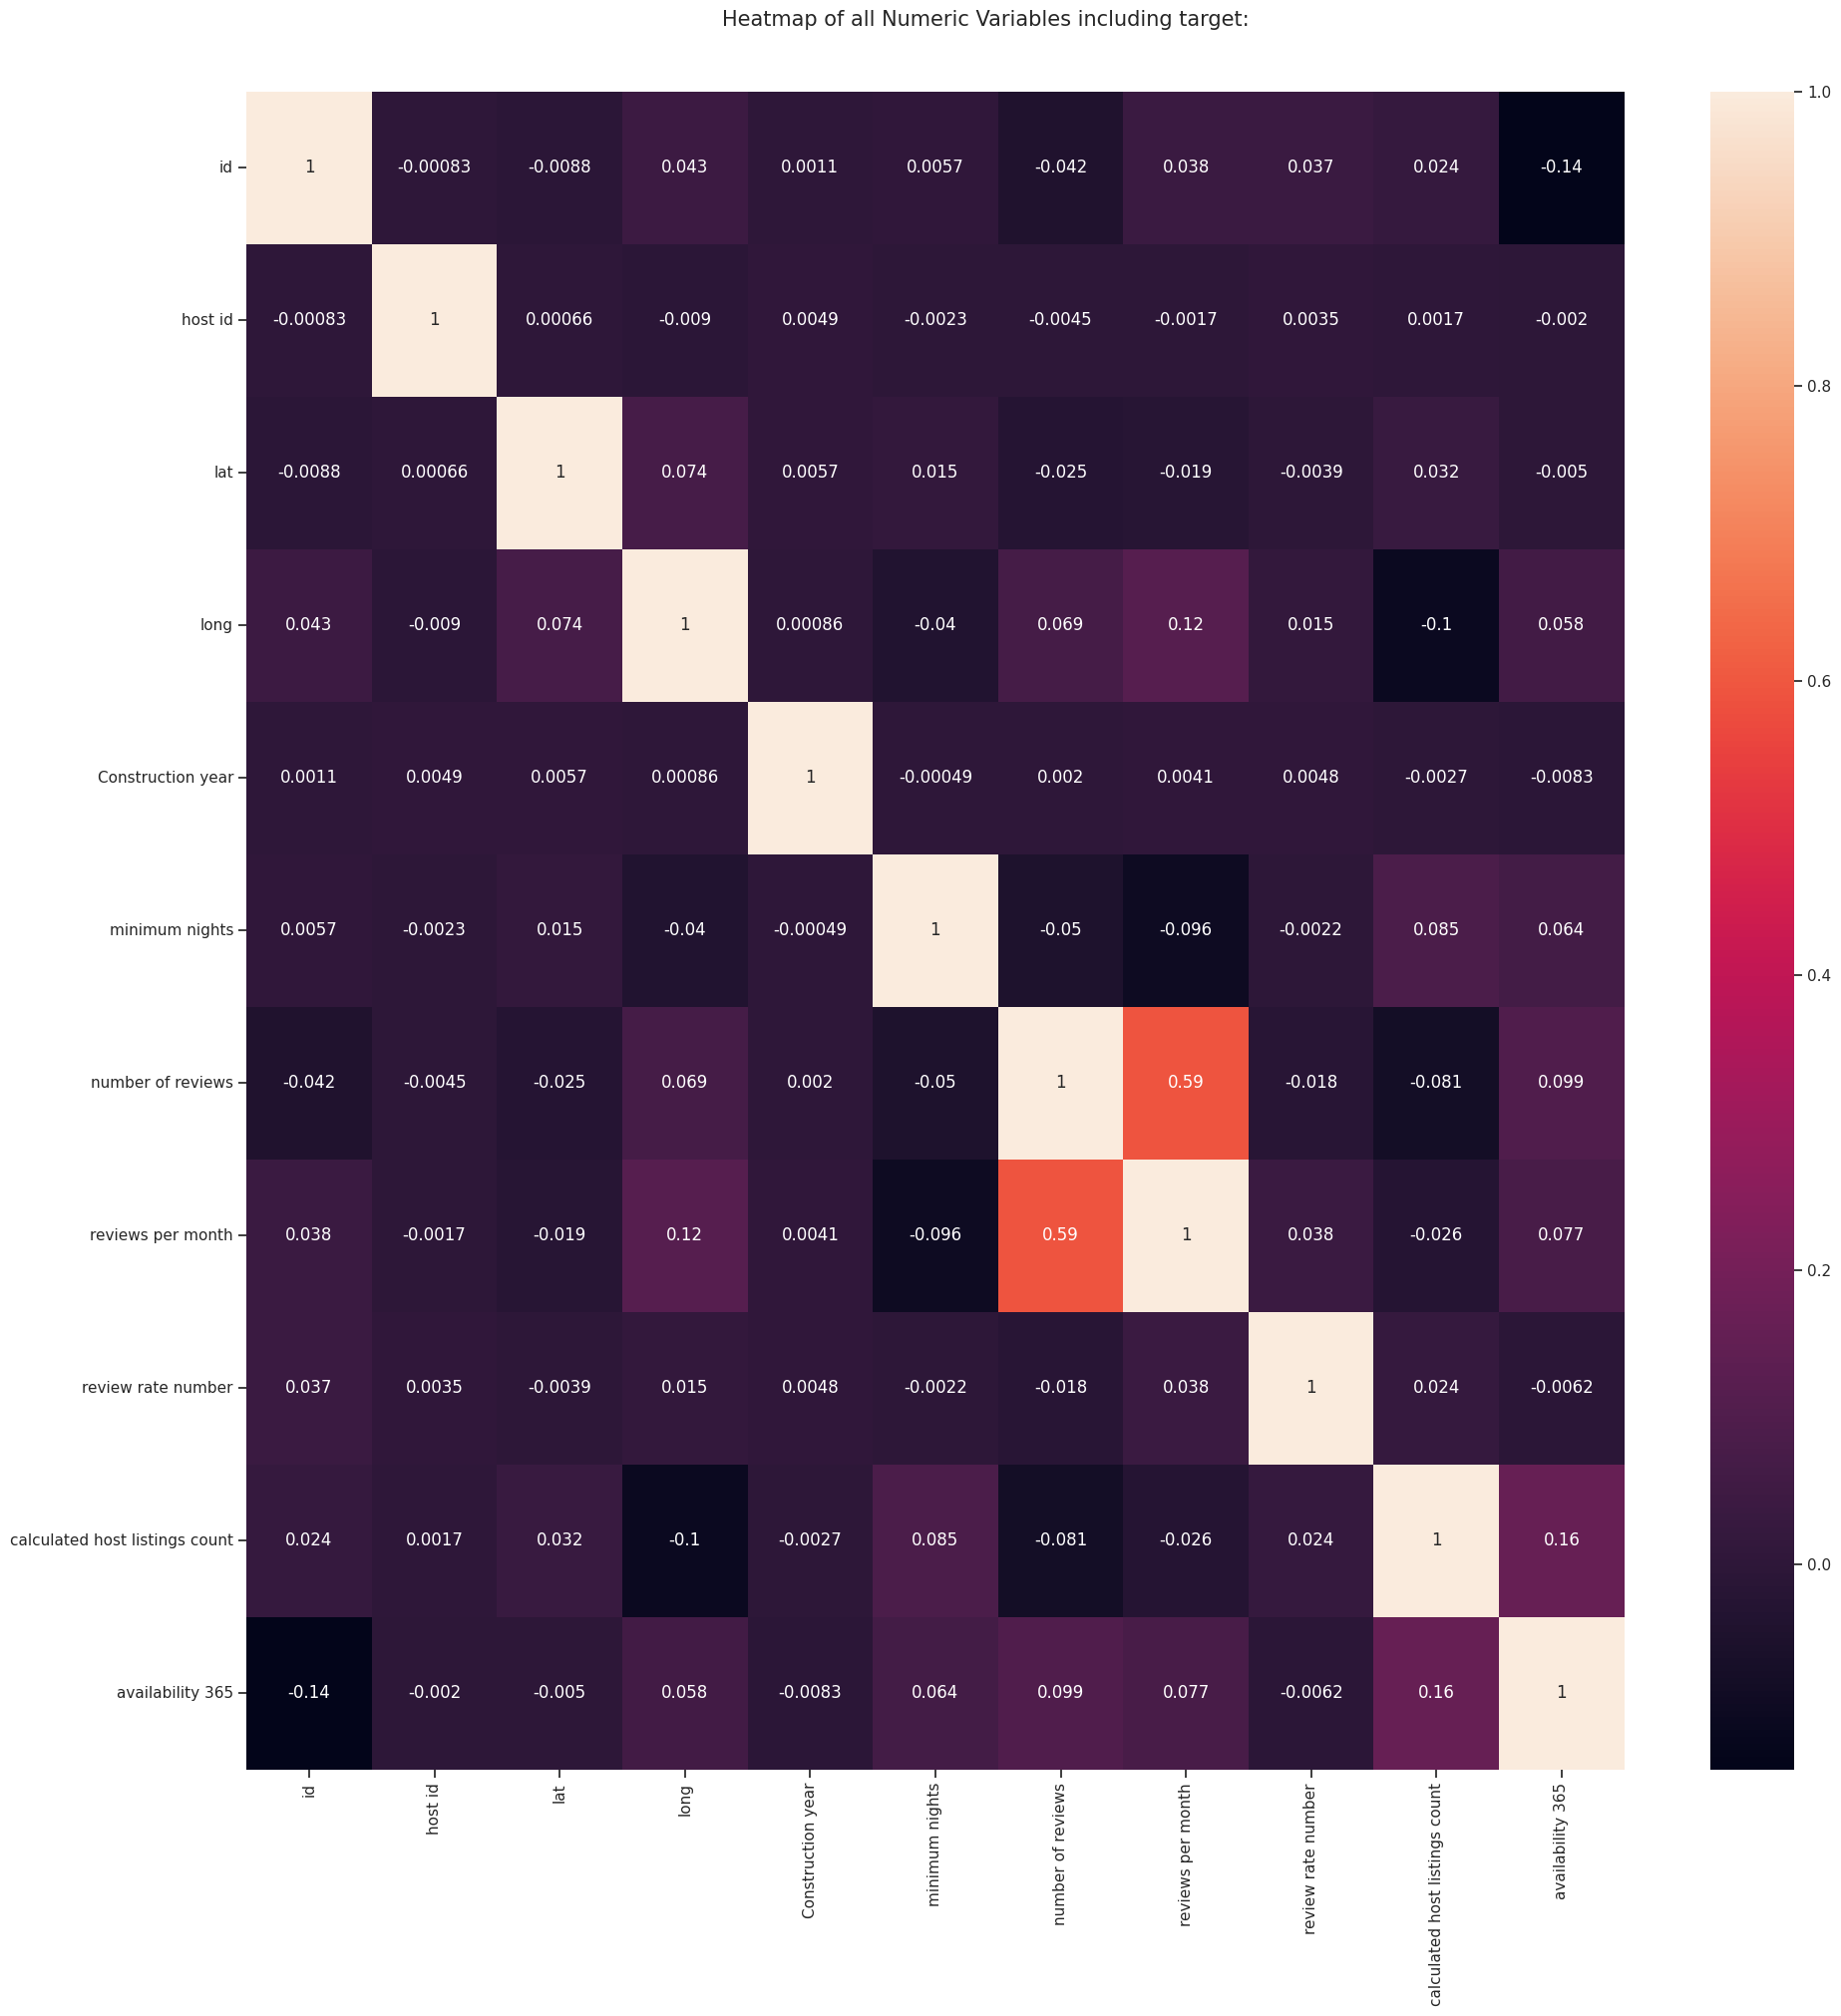

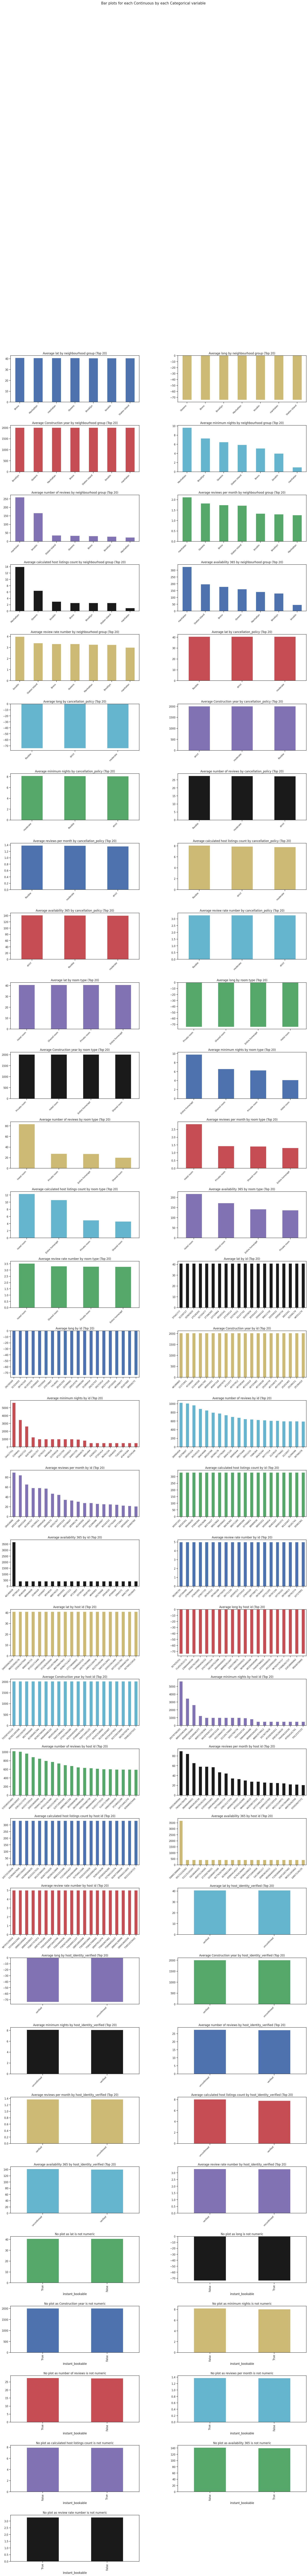

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

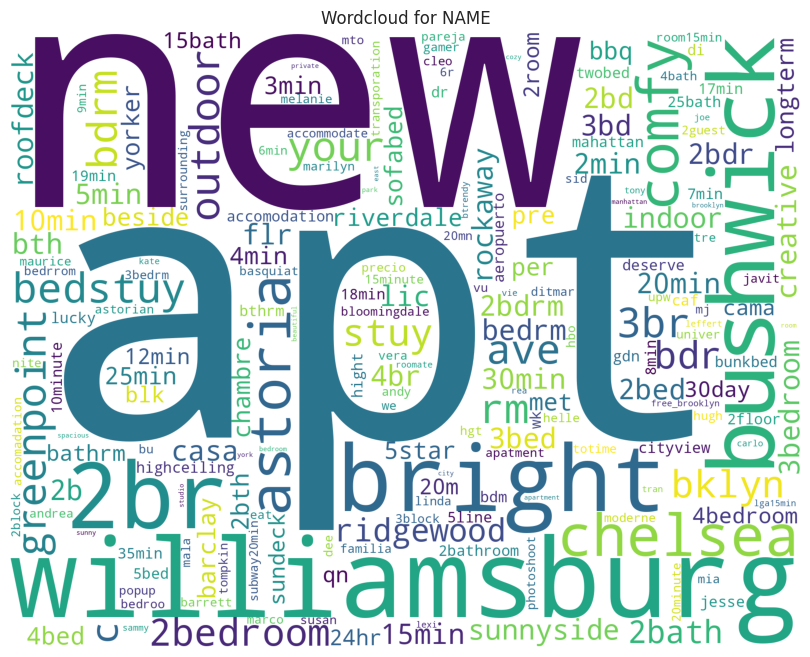

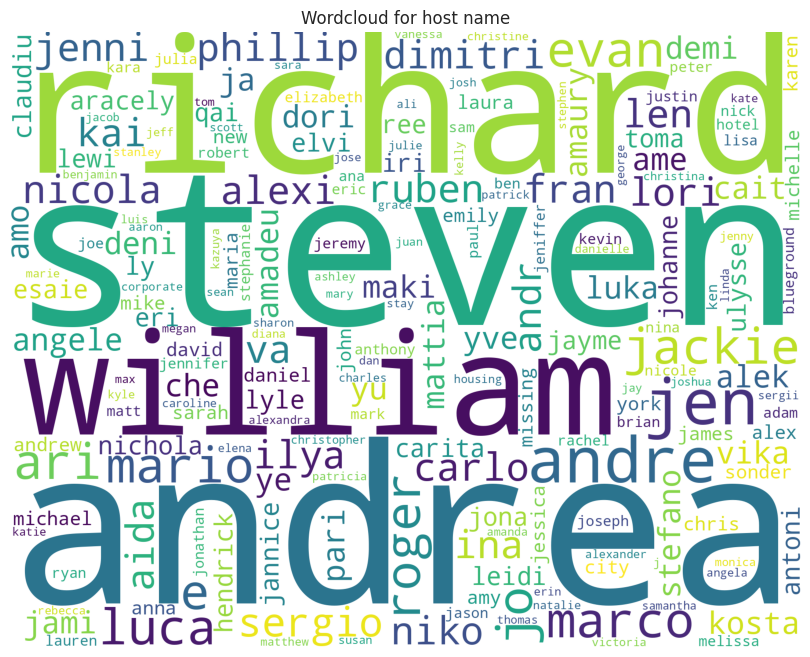

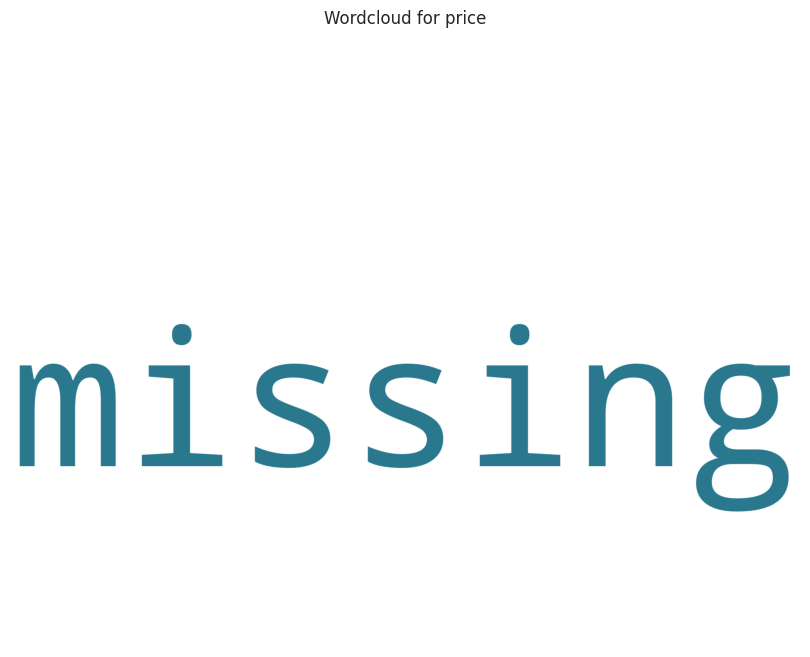

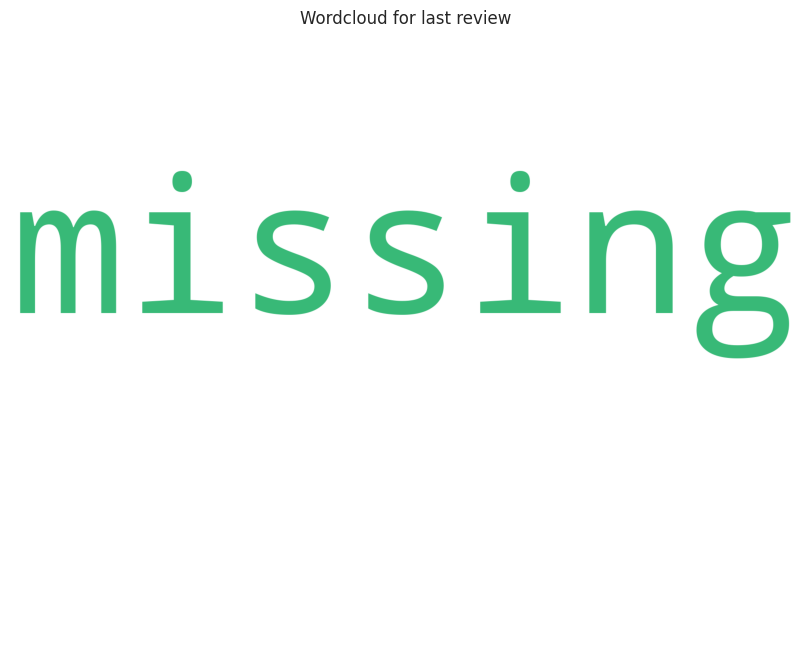

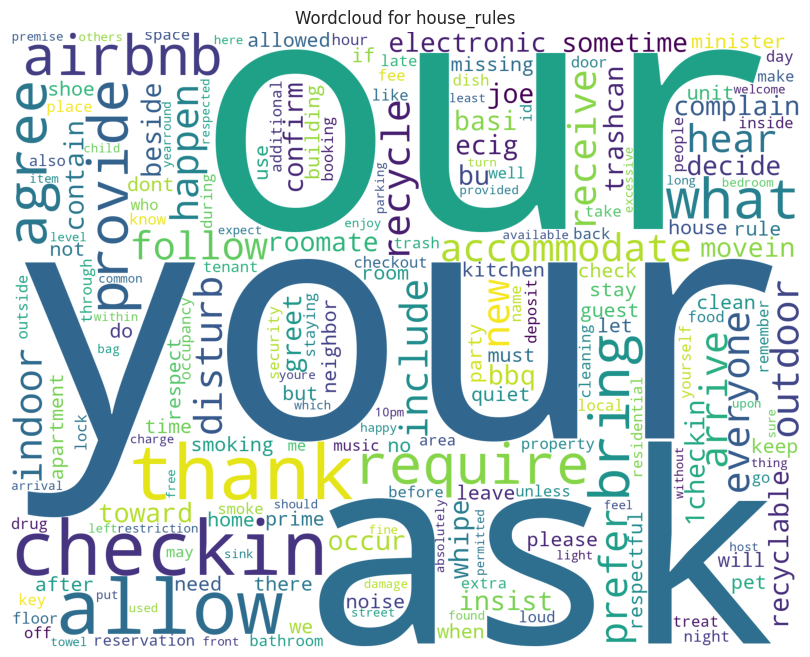

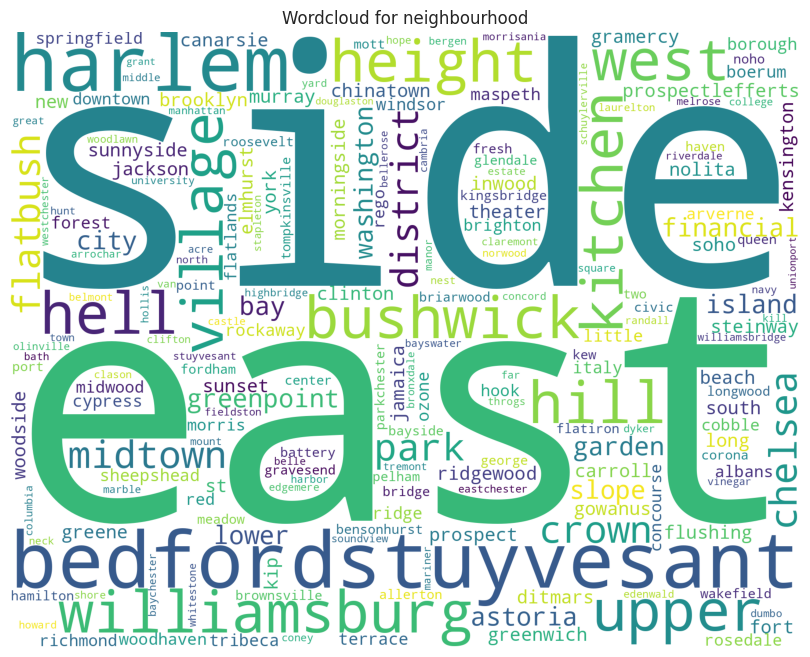

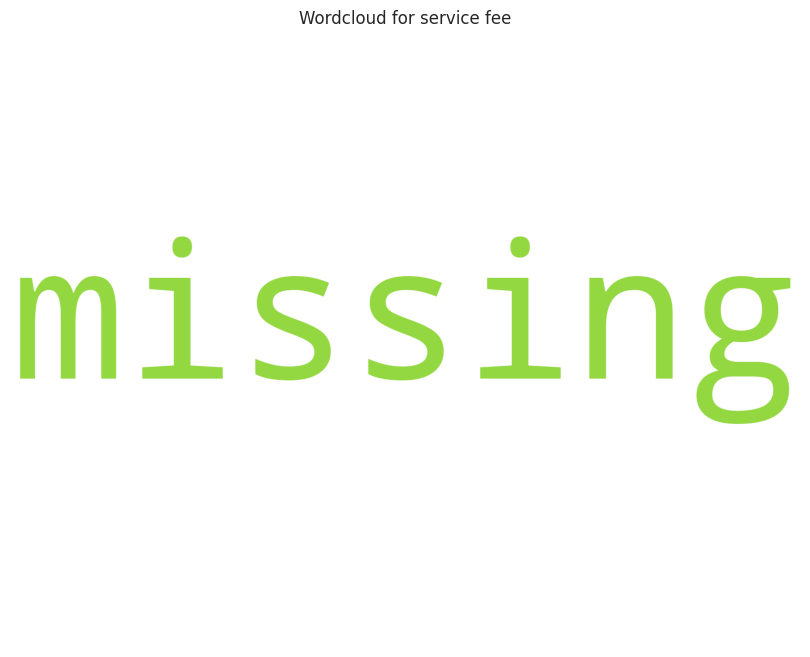

All Plots done
Time to run AutoViz = 330 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [33]:
!pip install autoviz

from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
%matplotlib inline
dft = AV.AutoViz(filename="", sep=",", depVar="", dfte=df, header=0, verbose=0,
                 lowess=False, chart_format="png", max_rows_analyzed=150000, max_cols_analyzed=30)

In [35]:
# Preprocesamiento
# 1. Limpieza de columnas relevantes
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)  # Limpiar columna 'price'
df = df.dropna(subset=['price'])  # Eliminar filas sin precio
df = df.drop(columns=['id', 'host id', 'NAME', 'host name', 'license'], errors='ignore')  # Eliminar columnas irrelevantes

# 2. Codificación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

# 3. Manejo de valores faltantes
df.fillna(df.median(), inplace=True)

# División en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración del entorno de PyCaret
setup(df=pd.concat([X_train, y_train], axis=1),
      target='price',
      session_id=42,
      normalize=True,
      silent=True)

# Comparación de modelos
best_model = compare_models()

# Entrenamiento del mejor modelo
final_model = finalize_model(best_model)

# Evaluación del modelo en datos de prueba
predictions = predict_model(final_model, df=X_test)
print(predictions.head())


NameError: name 'setup' is not defined